# Data Pre-processing

The structure, quality as well as quantity of data matters much in machine learning. Data preprocessing helps to scale, standardize, convert and transform data to an acceptable form before feeding into machine learning pipeline.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Standard Scaller

Standardization is used to transform continuous data to normally distributed format. There are some cases where is required

* Models are linear
* Dataset features have high variance 

The StandardScaler uses normally distributed data and seeks to scale them such that the distribution is now centred around 0, with a standard deviation of 1.

In [3]:
from sklearn.preprocessing import StandardScaler

Generate normally distributed data

In [4]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

<AxesSubplot:ylabel='Density'>

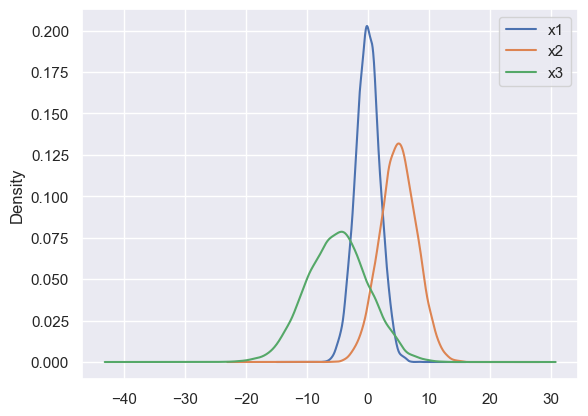

In [5]:
df.plot.kde()

In [6]:
ss = StandardScaler()

In [7]:
data_tf = ss.fit_transform(df)

In [8]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

<AxesSubplot:ylabel='Density'>

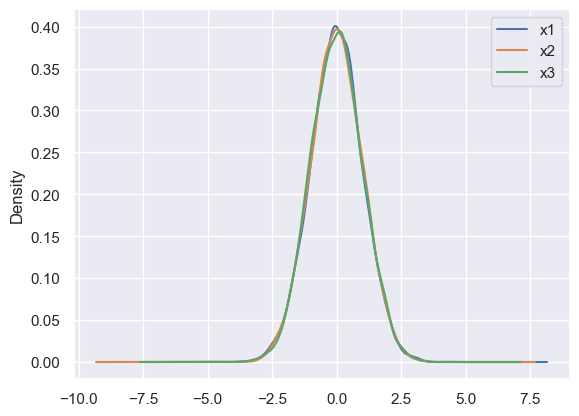

In [9]:
df.plot.kde()

## MiniMaxScaler

This is another scaller necessary in instances where:

* Need to calculate - Subtract min of column & div by difference between max & min
* Data shifts between 0 & 1
* Distribution is not suitable for StandardScaler.
* Need sensitivity to outliers

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

<AxesSubplot:ylabel='Density'>

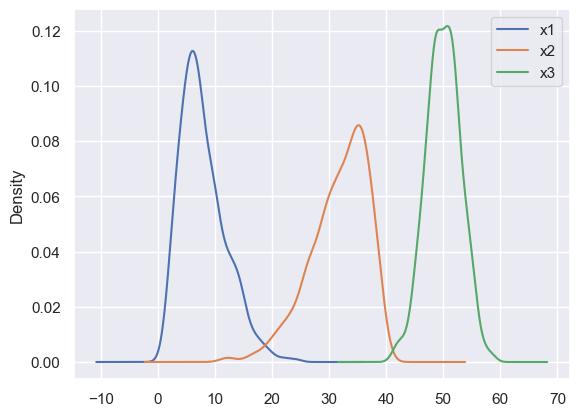

In [12]:
df.plot.kde()

In [13]:
mm = MinMaxScaler()
data_tf = mm.fit_transform(df)

<AxesSubplot:ylabel='Density'>

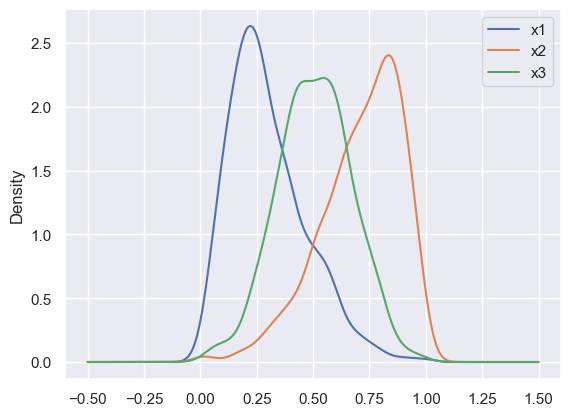

In [14]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## Robust Scaller

This is suited for data with outliers. It Calculates by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile

In [15]:
from sklearn.preprocessing import RobustScaler

In [16]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

<AxesSubplot:ylabel='Density'>

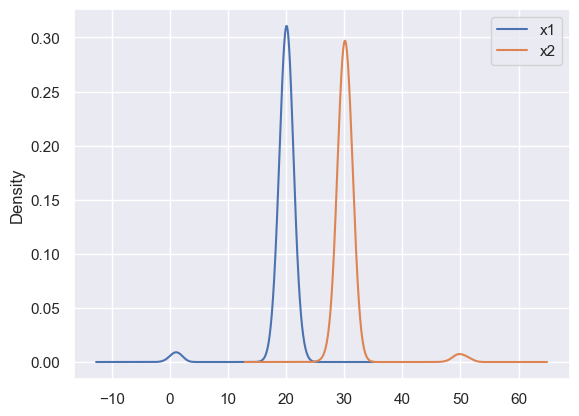

In [17]:
df.plot.kde()

In [18]:
robustscaler = RobustScaler()

In [19]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

<AxesSubplot:ylabel='Density'>

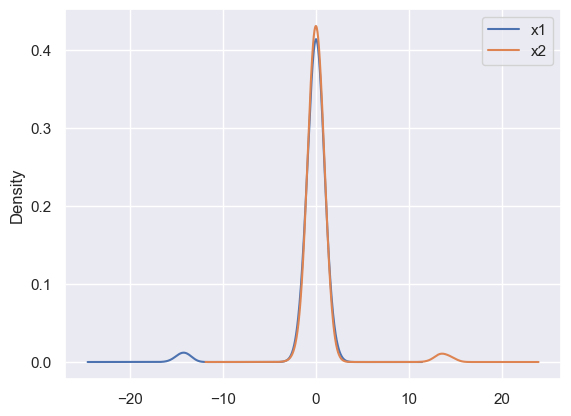

In [20]:
df.plot.kde()

## Normalizer

It centralizes data to origin. Each parameter value is obtained by dividing by magnitude

In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-80, 80, 1000).astype(float),
    'z1': np.random.randint(-150, 150, 1000).astype(float),
})

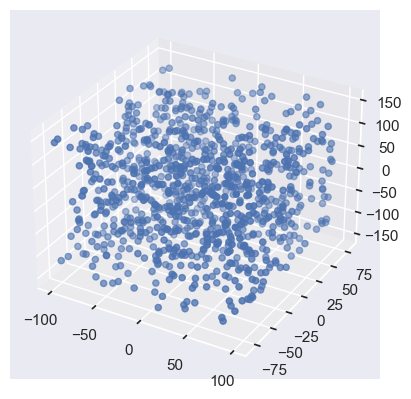

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [24]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [25]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

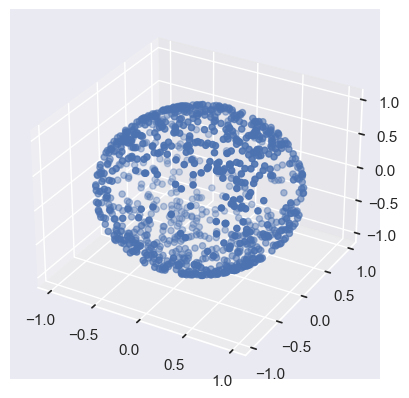

In [26]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## Binarization

This involves making threshold values to binary zero and one (0 or 1)

In [28]:
from sklearn.preprocessing import Binarizer

In [30]:
X = np.array([
    [1., -1., 2.],
    [2.,  0., 0.],
    [0.,  1., -1.]
])

In [33]:
binarizer = Binarizer()
data_tf = binarizer.fit_transform(X)
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Encoding Categorical Values

This maps ordinal values, low, medium & high to referenced values as required

In [35]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [36]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

In [37]:
df.Income.unique()

array(['Low', 'High', 'Medium'], dtype=object)

Label encoding and one hot encoding

In [38]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [40]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Gender':['Male','Female','Male','Female','Male','Male']})

In [41]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [43]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)
df

,Age,Gender,gender_tf
0,33,Male,1
1,44,Female,0
2,22,Male,1
3,44,Female,0
4,55,Male,1
5,22,Male,1


In [44]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## Imputation

This is useful in handling missing values. Missing data values can be inferred from existing data

In [46]:
from sklearn.impute import SimpleImputer

In [45]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [48]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit_transform(df)

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## Polynomial Features

This is useful in deriving non-linear features by data convertion to higher degree after learning the model

In [50]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [52]:
pol = PolynomialFeatures(degree=2)
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## Custom Transformer

An existing Python function can be converted into a transformer for use in data cleaning or processing by use of FunctionTransformer

In [53]:
from sklearn.preprocessing import FunctionTransformer

In [54]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [55]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [57]:
customtransformer = FunctionTransformer(mapping, validate=False)
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4
